# Retail Data Wrangling and Analytics

In [2]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#install psql "driver"
!pip3 install psycopg2-binary

In [4]:
url = "https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv"
retail_df = pd.read_csv(url)
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Load CSV into Dataframe
Alternatively, the LGS IT team also dumped the transactional data into a [CSV file](https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv). However, the CSV header (column names) doesn't follow the snakecase or camelcase naming convention (e.g. `Customer ID` instead of `customer_id` or `CustomerID`). As a result, you will need to use Pandas to clean up the data before doing any analytics. In addition, unlike the PSQL scheme, CSV files do not have data types associated. Therefore, you will need to cast/convert certain columns into correct data types (e.g. DateTime, numbers, etc..)

**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [5]:
# Rename all columns to upper camelcase or snakecase
retail_df.columns = ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country']

# Display the first few rows of the DataFrame to verify the column names
retail_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:

# URL of the CSV file
url = "https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv"

# Read the data into a DataFrame
retail_df = pd.read_csv(url)

# Rename all columns to upper camelcase or snakecase
retail_df.columns = ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country']

# Display the first few rows of the DataFrame to verify the column names
retail_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
# Convert/cast all columns to the appropriate data types
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df['CustomerID'] = retail_df['CustomerID'].astype('Int64') 
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


# Total Invoice Amount Distribution

---
**Please remove this insturction cell after you are done with coding**

1. Calculate the invoice amount. Note: an invoice consists of one or more items where each item is a row in the df. (hint: you need to `GROUP BY invoice`)
2. Draw the distribution of invoice amount with min, max, median, mod, and mean. However, you will notice many outlier data (e.g. invoices with large amounts). Sample hist and box charts:

![](https://i.imgur.com/N8hsbDa.jpg)

3. Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.


![](https://i.imgur.com/tJrH1qj.jpg)


---

In [8]:
# Calculate the invoice amount by multiplying Quantity and Price for each item
retail_df['TotalAmount'] = retail_df['Quantity'] * retail_df['Price']

# Group by 'Invoice' and sum the 'TotalAmount' for each invoice
invoice_amounts = retail_df.groupby('Invoice')['TotalAmount'].sum()

# Display the invoice amounts
print(invoice_amounts)


Invoice
489434        505.30
489435        145.80
489436        630.33
489437        310.75
489438       2286.24
             ...    
C581484   -168469.60
C581490       -32.53
C581499      -224.69
C581568       -54.75
C581569        -7.50
Name: TotalAmount, Length: 53628, dtype: float64


Minimum: 0.19
Maximum: 168469.6
Median: 304.315
Mode: 15.0
Mean: 523.3037611158244


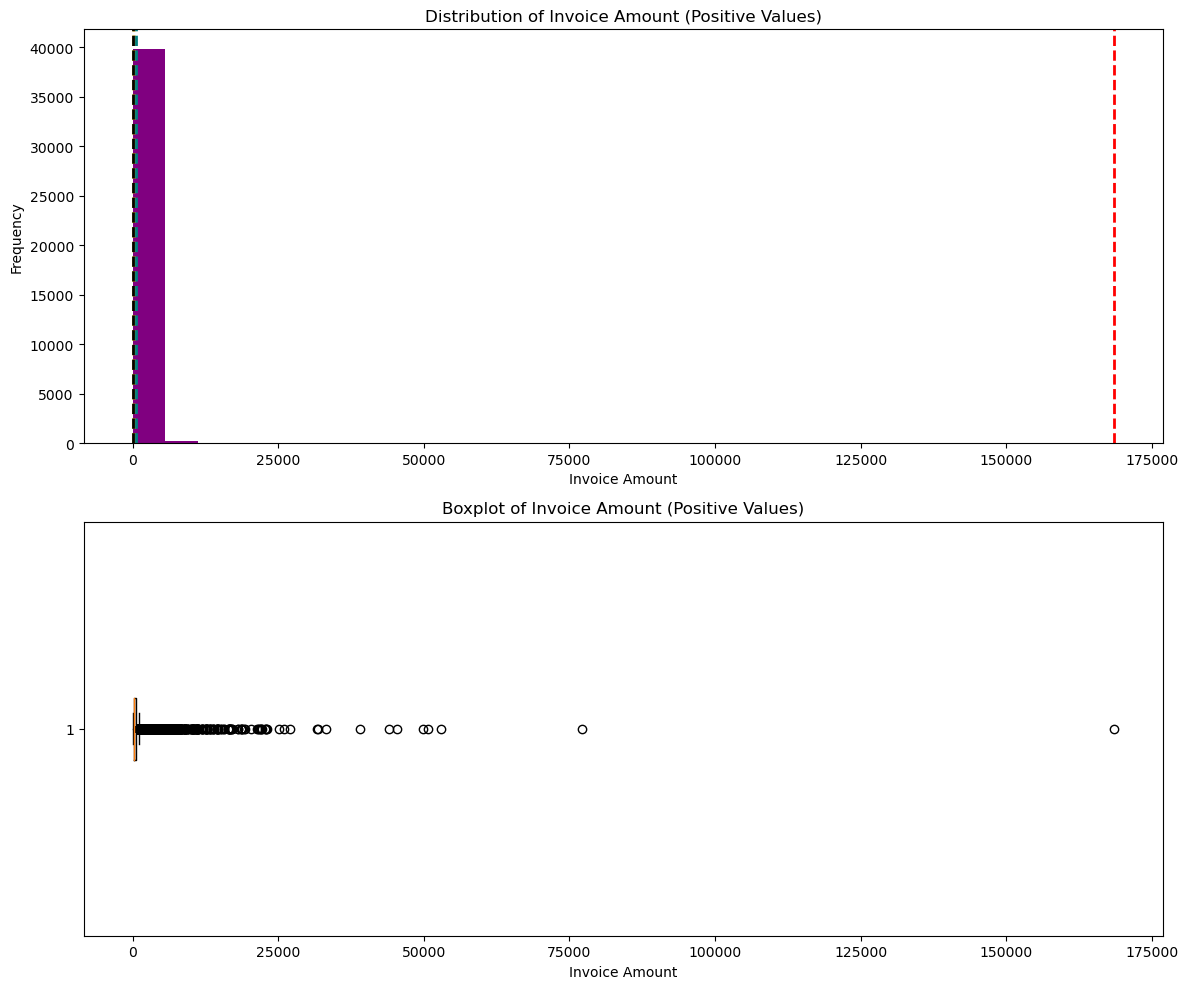

In [9]:
# Filter out negative values
positive_invoice_amounts = invoice_amounts[invoice_amounts > 0]

# Calculate statistics
min_amount = positive_invoice_amounts.min()
max_amount = positive_invoice_amounts.max()
median_amount = positive_invoice_amounts.median()
mode_amount = positive_invoice_amounts.mode().iloc[0]
mean_amount = positive_invoice_amounts.mean()

# Display individual values
print(f"Minimum: {min_amount}")
print(f"Maximum: {max_amount}")
print(f"Median: {median_amount}")
print(f"Mode: {mode_amount}")
print(f"Mean: {mean_amount}")

# Distribution plot and boxplot of invoice amount
plt.figure(figsize=(12, 10))

# Top subplot (Distribution)
plt.subplot(2, 1, 1)
plt.hist(positive_invoice_amounts, bins=30, color='purple')
plt.axvline(min_amount, color='yellow', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_amount, color='red', linestyle='dashed', linewidth=2, label='Max')
plt.axvline(median_amount, color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_amount, color='black', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(mean_amount, color='teal', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Distribution of Invoice Amount (Positive Values)')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')

# Bottom subplot (Boxplot)
plt.subplot(2, 1, 2)
plt.boxplot(positive_invoice_amounts, vert=False)
plt.title('Boxplot of Invoice Amount (Positive Values)')
plt.xlabel('Invoice Amount')

plt.tight_layout()
plt.show()



Minimum: 0.19
Maximum: 724.25
Median: 256.235
Mode: 15.0
Mean: 271.68389129924515


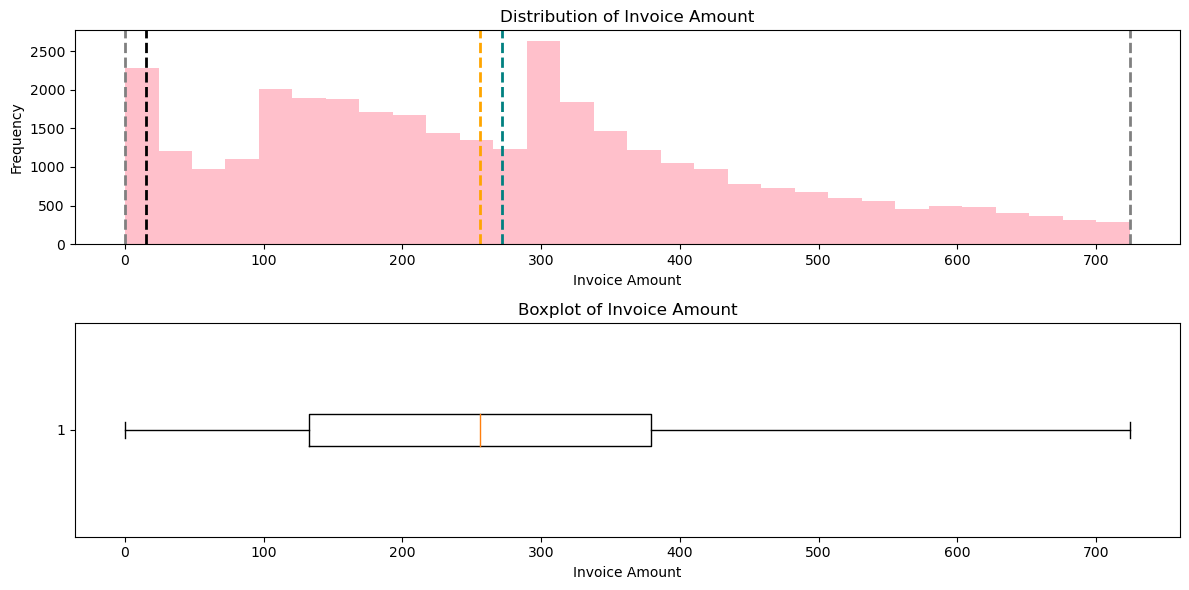

In [10]:
# Assuming `invoice_amounts` contains the invoice amounts after summing and grouping by invoice
quantile_85 = positive_invoice_amounts.quantile(0.85)

# Filter out invoices below the 85th percentile
remove_outliers = positive_invoice_amounts[positive_invoice_amounts <= quantile_85]

min_amount = remove_outliers.min()
max_amount = remove_outliers.max()
median_amount = remove_outliers.median()
mode_amount = remove_outliers.mode().iloc[0]
mean_amount = remove_outliers.mean()

# Display individual values
print(f"Minimum: {min_amount}")
print(f"Maximum: {max_amount}")
print(f"Median: {median_amount}")
print(f"Mode: {mode_amount}")
print(f"Mean: {mean_amount}")

# Draw the distribution for the first 85 quantiles of the invoice amount data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(remove_outliers, bins=30, color='pink')
plt.axvline(min_amount, color='grey', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_amount, color='grey', linestyle='dashed', linewidth=2, label='Max')
plt.axvline(median_amount, color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_amount, color='black', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(mean_amount, color='teal', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Distribution of Invoice Amount')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')

# Bottom subplot (Boxplot)
plt.subplot(2, 1, 2)
plt.boxplot(remove_outliers, vert=False)
plt.title('Boxplot of Invoice Amount')
plt.xlabel('Invoice Amount')

plt.tight_layout()
plt.show()


# Monthly Placed and Canceled Orders

---
**Please remove this insturction cell after you are done with coding**

- The attribute information (see the `project kick-off` section) contains useful information that helps you to identify canceled orders
- To simplify the problem, you can assume that there are two invoice numbers for each canceled order (one for the original invoice and one for the canceled invoice). Therefore, `# of placed orders = total # of orders - 2 * canceled order`. Furthermore, you can also assume the original invoice and canceled invoice are on always on the same day (this eliminate the case where the original invoice and canceled invoices are on different months)
- hints: you might want to create a new integer column with YYYYMM format. e.g. `2009-12-01 07:45:00 -> 200912` which allows easy GROUP BY.

**Sample Plot:**

![](https://i.imgur.com/tmLsPDf.jpg)

---

In [11]:
# Create new integer column 'year_month' with YYYYMM format
retail_df['year_month'] = retail_df['InvoiceDate'].dt.strftime('%Y%m')
retail_df['year_month'] = retail_df['year_month'].astype(int)
retail_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,200912


In [12]:
# Total orders per month
Total_per_month = retail_df.groupby('year_month')['Invoice'].nunique()
Total_per_month.head()

year_month
200912    2330
201001    1633
201002    1969
201003    2367
201004    1892
Name: Invoice, dtype: int64

In [13]:
# Total cancelled orders 
cancelled_order = retail_df[retail_df['Invoice'].str.startswith('C')]
cancelled_order.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,year_month
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.4,200912
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-9.9,200912
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.0,200912
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-12.6,200912
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.4,200912


In [14]:
# Cancelled orders per month
monthly_cancelled_order = cancelled_order.groupby('year_month')['Invoice'].nunique()
monthly_cancelled_order.head()

year_month
200912    401
201001    300
201002    240
201003    407
201004    304
Name: Invoice, dtype: int64

In [15]:
# Placed orders per month
Total_per_month = Total_per_month - 2 * monthly_cancelled_order
Total_per_month.head()

year_month
200912    1528
201001    1033
201002    1489
201003    1553
201004    1284
Name: Invoice, dtype: int64

In [16]:
# Convert 'monthly_cancelled_orders' and 'Total_per_month' Series to DataFrames
df_monthly_cancelled_orders = monthly_cancelled_order.to_frame(name='cancelled_orders')
df_total_per_month = Total_per_month.to_frame(name='placed_orders')

# Merge the two dataframes based on 'year_month' column
df_merged = pd.merge(df_total_per_month, df_monthly_cancelled_orders, left_index=True, right_index=True)
df_merged.head()


,placed_orders,cancelled_orders
year_month,,
200912,1528,401
201001,1033,300
201002,1489,240
201003,1553,407
201004,1284,304


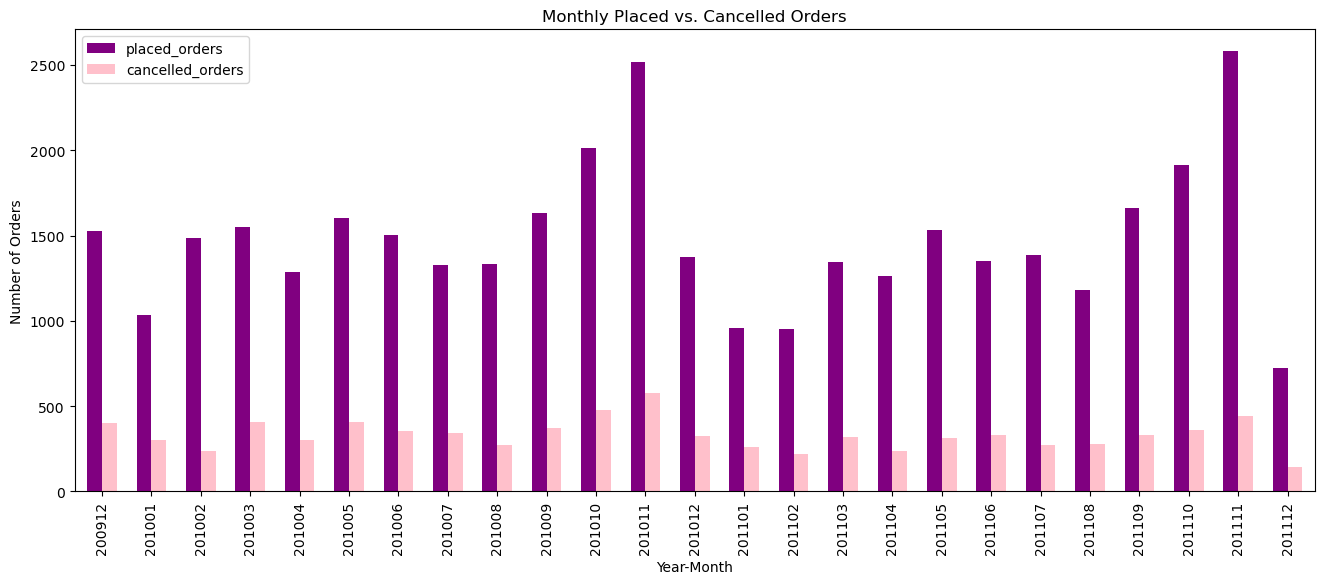

In [17]:
# Plot chart
order_plot = df_merged.plot(kind='bar', width=0.6, figsize=(16, 6), color = ['purple', 'pink'])
order_plot.set_title('Monthly Placed vs. Cancelled Orders')
order_plot.set_xlabel('Year-Month')
order_plot.set_ylabel('Number of Orders')

plt.show()

# Monthly Sales

In [18]:
monthly_sales = retail_df.groupby('year_month')['TotalAmount'].sum()
monthly_sales = monthly_sales.to_frame(name = 'sales')
monthly_sales.head()

,sales
year_month,
200912,799847.110
201001,624032.892
201002,533091.426
201003,765848.761
201004,590580.432


In [19]:
monthly_sales.index.dtype

dtype('int64')

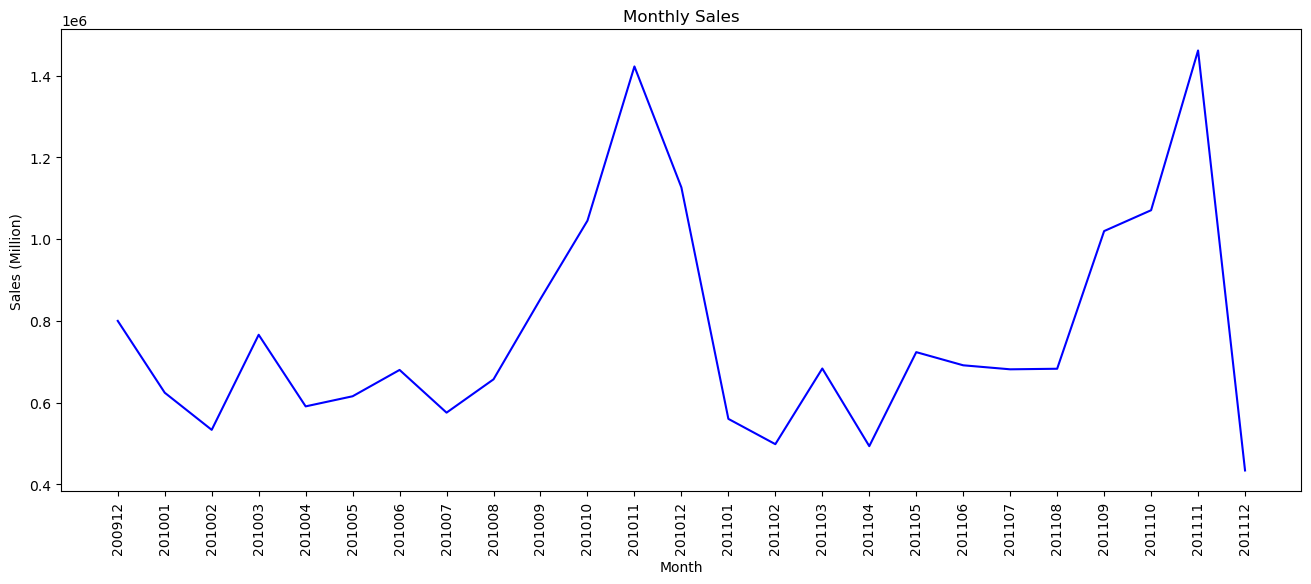

In [20]:
monthly_sales.index = monthly_sales.index.astype(str)
plt.figure(figsize=(16,6))
plt.plot(monthly_sales.index, monthly_sales['sales'], color='blue')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales (Million)')
plt.xticks(rotation=90)

plt.show()

---
**Please remove this insturction cell after you are done with coding**


- Calculate the monthly sales data
- Plot a chart to show monthly sales (e.g. x-asix=year_month, y-axis=sales_amount)

![](https://i.imgur.com/k1KOqKO.jpg)

---

# Monthly Sales Growth


---
**Please remove this insturction cell after you are done with coding**

- Calculate monthly sales percentage growth data
- Plot a chart to show the growth percentage

![](https://i.imgur.com/J3btp8j.jpg)

---

In [22]:
# Calculate monthly sales percentage growth
monthly_sales['growth'] = monthly_sales['sales'].pct_change() * 100
monthly_sales['growth'] = monthly_sales['growth'].round(2)
print (monthly_sales)

                  sales  growth
year_month                     
200912       799847.110     NaN
201001       624032.892  -21.98
201002       533091.426  -14.57
201003       765848.761   43.66
201004       590580.432  -22.89
201005       615322.830    4.19
201006       679786.610   10.48
201007       575236.360  -15.38
201008       656776.340   14.18
201009       853650.431   29.98
201010      1045168.350   22.44
201011      1422654.642   36.12
201012      1126445.470  -20.82
201101       560000.260  -50.29
201102       498062.650  -11.06
201103       683267.080   37.18
201104       493207.121  -27.82
201105       723333.510   46.66
201106       691123.120   -4.45
201107       681300.111   -1.42
201108       682680.510    0.20
201109      1019687.622   49.37
201110      1070704.670    5.00
201111      1461756.250   36.52
201112       433686.010  -70.33


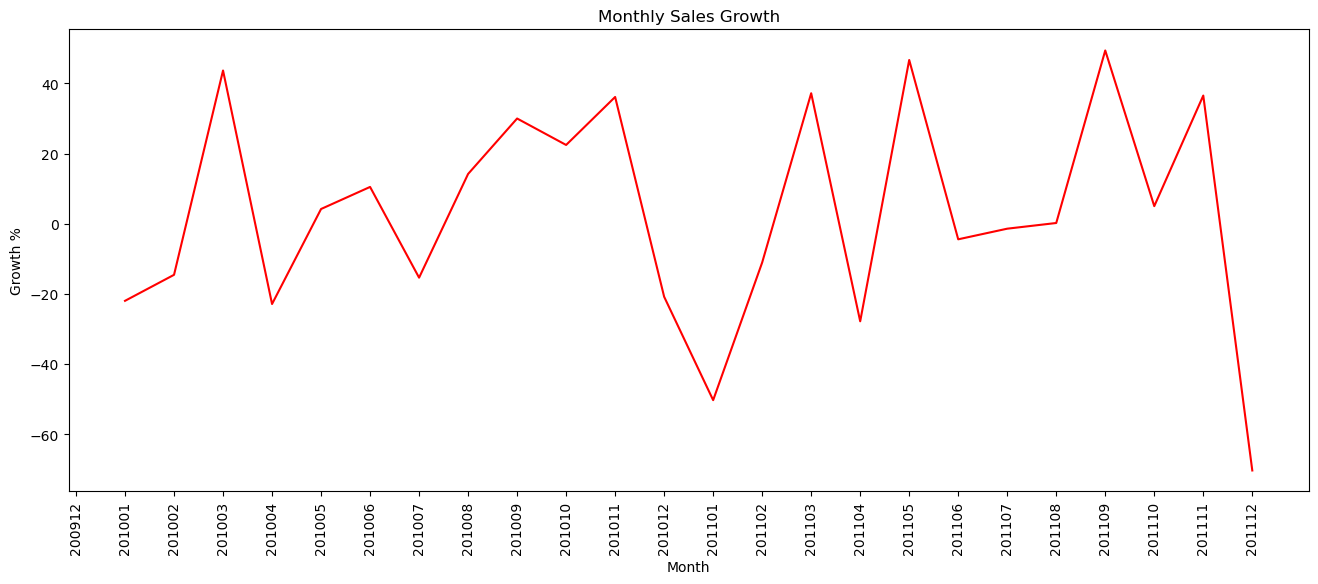

In [25]:
# Plot a chart to show the growth percentage
plt.figure(figsize=(16,6))
plt.plot(monthly_sales.index, monthly_sales['growth'], color='red')

plt.title('Monthly Sales Growth')
plt.xlabel('Month')
plt.ylabel('Growth %')
plt.xticks(rotation=90)

plt.show()

# Monthly Active Users

---
**Please remove this insturction cell after you are done with coding**

- Compute # of active users (e.g. unique `CusotomerID`) for each month
- Plot a bar chart

![](https://i.imgur.com/eFYp8VF.jpg)

---

In [30]:
# Number of active users for each month
monthly_active = retail_df.groupby('year_month')['CustomerID'].nunique()
monthly_active.head()

year_month
200912    1045
201001     786
201002     807
201003    1111
201004     998
Name: CustomerID, dtype: int64

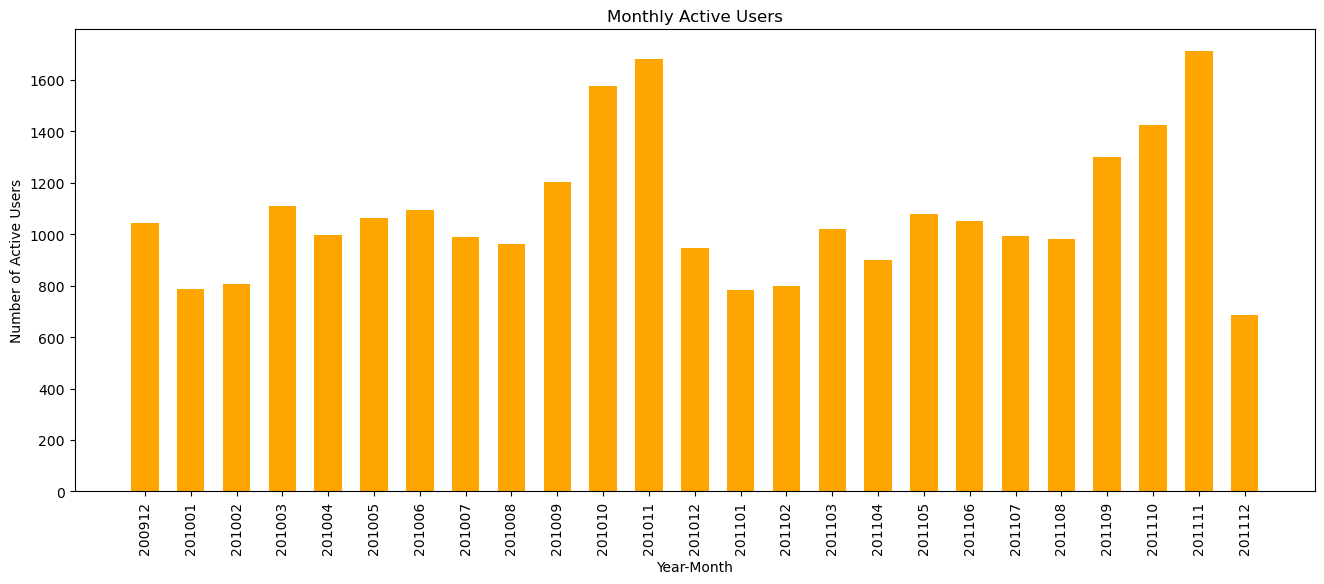

In [31]:
# Plot the bar chart
monthly_active.index = monthly_active.index.astype(str)
plt.figure(figsize=(16,6))
plt.bar(monthly_active.index, monthly_active, color='orange', width = 0.6)

plt.title('Monthly Active Users')
plt.xlabel('Year-Month')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=90)

plt.show()

# New and Existing Users



---
**Please remove this insturction cell after you are done with coding**

- Plot a diagram to show new and exiting user for each month.
- A user is identified as a new user when he/she makes the first purchase
- A user is identified as an existing user when he/she made purchases in the past
- hints:
  - find out the first purchase year-month for each user and then join this data with the transactional data to help you identified new/exiting users

![](https://i.imgur.com/nWjnrpr.jpg)

---

In [34]:
# Find the first purchase of each user
fst_purchase = retail_df.groupby('CustomerID')['year_month'].min()
fst_purchase_df = fst_purchase.reset_index(name='year_month')
fst_purchase_df.head()

,CustomerID,year_month
0,12346,200912
1,12347,201010
2,12348,201009
3,12349,200912
4,12350,201102


In [35]:
# Join the first purchase data with the transactional data on customer_id to identify new/exiting users
joined_df = pd.merge(retail_df, fst_purchase_df, on='CustomerID', how='left')

# Create a new column 'user_type' with value 'Existing'
joined_df['user_type'] = 'Existing'

joined_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,year_month_x,year_month_y,user_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,200912,200912.0,Existing
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,200912,200912.0,Existing
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,200912,200912.0,Existing
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,200912,200912.0,Existing
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,200912,200912.0,Existing


In [37]:
# If the 'year_month_x' matches the 'year_month_y', the user is identified as 'New'; otherwise,'Existing'
joined_df.loc[joined_df['year_month_x'] == joined_df['year_month_y'], 'user_type'] = 'New'
joined_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,year_month_x,year_month_y,user_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,200912,200912.0,New
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,200912,200912.0,New
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,200912,200912.0,New
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,200912,200912.0,New
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,200912,200912.0,New


In [39]:
# Count the number of users for each month and user type
count_user = joined_df.groupby(['year_month_x', 'user_type'])['CustomerID'].nunique().reset_index()
count_user.head()

,year_month_x,user_type,CustomerID
0,200912,Existing,0
1,200912,New,1045
2,201001,Existing,392
3,201001,New,394
4,201002,Existing,444


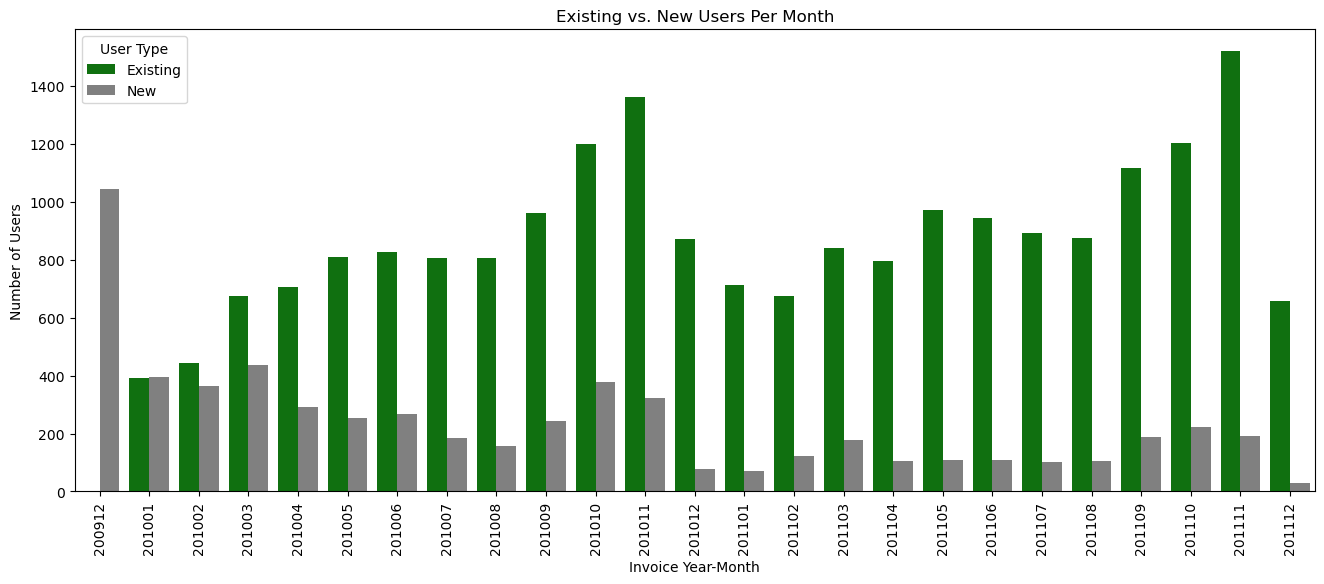

In [41]:
# Plot the number of existing and new users per month
plt.figure(figsize=(16, 6))
sns.barplot(x='year_month_x', y='CustomerID', hue='user_type', data=count_user, palette={'New': 'grey', 'Existing': 'green'})

plt.title('Existing vs. New Users Per Month')
plt.xlabel('Invoice Year-Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.legend(title='User Type')

plt.show()

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [44]:
# Get the latest purchase date of each customer
latest_purchasedate = retail_df.groupby('CustomerID')['InvoiceDate'].max()

# Get the difference between the current date and last purchase date of each customer
current_date = pd.to_datetime('today')
recency = (current_date - latest_purchasedate).dt.days
recency.head()

CustomerID
12346    4788
12347    4465
12348    4538
12349    4481
12350    4773
Name: InvoiceDate, dtype: int64

In [46]:
# Get the purchase frequency of each customer
frequency = retail_df.groupby('CustomerID')['Invoice'].nunique()
frequency.head()

CustomerID
12346    17
12347     8
12348     5
12349     5
12350     1
Name: Invoice, dtype: int64

In [48]:
# Get the total monetary values of each customer
monetary = retail_df.groupby('CustomerID')['TotalAmount'].sum()
monetary.head()

CustomerID
12346     -64.68
12347    5633.32
12348    2019.40
12349    4404.54
12350     334.40
Name: TotalAmount, dtype: float64

In [49]:
# Create the RFM table
rfm_table = pd.concat([recency, frequency, monetary], axis=1)
rfm_table.columns = ['recency', 'frequency', 'monetary']
rfm_table.head()

,recency,frequency,monetary
CustomerID,,,
12346,4788,17,-64.68
12347,4465,8,5633.32
12348,4538,5,2019.40
12349,4481,5,4404.54
12350,4773,1,334.40


# RFM Segmentation

---
**Please remove this insturction cell after you are done with coding**
RFM segmentation categorizes your customers into different segments, according to their interactions with your website, which will allow you to subsequently approach these groups in the most effective way. In this article, we will show you how to make an RFM segmentation based on an RFM score combining all three RFM parameters together and allowing you to divide your customers into 11 different segments. 

- [RFM Segmentation business cases](https://docs.exponea.com/docs/rfm-segmentation-business-use)

- [RFM Segmentation Guide](https://docs.exponea.com/docs/rfm-segmentation-business-use)

As you can see, computing RFM segmentation requires extensive domain knowledge in marketing which is out of the scope in this project. In practice, you will work with BA/DA to figure out how to compute RFM segments. To simplify this project, a [sample RFM segmentation Notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) is provided. You are responsible to understand everything from that Notebook and then integrate it into yours. 

- Download the [sample notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) and import to your Jupyter Notebook or VSCode
- Run the notebook and understand all cells
- Read the remark section at the end of the notebook. You will need this information when writing the README file
- Integrate the RFM segmentation calculation into your notebook

---

In [50]:
# RFM score values 
rfm_table['recency_score'] = pd.qcut(rfm_table['recency'],5,labels=[5,4,3,2,1])
rfm_table['frequency_score'] = pd.qcut(rfm_table['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_table['monetary_score'] = pd.qcut(rfm_table['monetary'],5,labels=[1,2,3,4,5])

rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346,4788,17,-64.68,2,5,1
12347,4465,8,5633.32,5,4,5
12348,4538,5,2019.40,3,3,4
12349,4481,5,4404.54,5,3,5
12350,4773,1,334.40,2,1,2


In [51]:
# RFM score values are combined side by side in str format
(rfm_table['recency_score'].astype(str) + 
 rfm_table['frequency_score'].astype(str) + 
 rfm_table['monetary_score'].astype(str)).head()

CustomerID
12346    251
12347    545
12348    334
12349    535
12350    212
dtype: object

In [52]:
# Calculation of the RFM score
rfm_table["RFM_SCORE"] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str) + rfm_table['monetary_score'].astype(str)

rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346,4788,17,-64.68,2,5,1,251
12347,4465,8,5633.32,5,4,5,545
12348,4538,5,2019.40,3,3,4,334
12349,4481,5,4404.54,5,3,5,535
12350,4773,1,334.40,2,1,2,212


In [53]:
# Transposition of the RFM table.
rfm_table.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,5942.0,4665.457085,211.881245,4463.00,4487.0000,4558.50,4844.000,5201.00
frequency,5942.0,7.552339,15.972262,1.00,2.0000,4.00,8.000,510.00
monetary,5942.0,2801.799459,13973.922553,-25111.09,325.0975,843.97,2182.005,598215.22


In [54]:
# Customers with RFM Score 555
rfm_table[rfm_table["RFM_SCORE"] == "555"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12359,4470,14,8714.89,5,5,5,555
12362,4466,14,5284.58,5,5,5,555
12395,4478,18,5046.92,5,5,5,555
12417,4466,27,6708.21,5,5,5,555
12433,4463,11,20428.86,5,5,5,555


In [55]:
# Customers with RFM Score 111
rfm_table[rfm_table["RFM_SCORE"] == "111"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12382,5145,1,-18.38,1,1,1,111
12387,4878,1,143.94,1,1,1,111
12392,5054,1,234.75,1,1,1,111
12400,4877,1,205.25,1,1,1,111
12404,5145,1,63.24,1,1,1,111


In [56]:
# Segmenting of customers according to recency_score and frequency_score values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [57]:
# Create segment variable
rfm_table['segment'] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346,4788,17,-64.68,2,5,1,251,25
12347,4465,8,5633.32,5,4,5,545,54
12348,4538,5,2019.40,3,3,4,334,33
12349,4481,5,4404.54,5,3,5,535,53
12350,4773,1,334.40,2,1,2,212,21


In [58]:
# Replace segment values from score to segment names
rfm_table['segment'] = rfm_table['segment'].replace(seg_map, regex=True)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346,4788,17,-64.68,2,5,1,251,Can't Lose
12347,4465,8,5633.32,5,4,5,545,Champions
12348,4538,5,2019.40,3,3,4,334,Need Attention
12349,4481,5,4404.54,5,3,5,535,Potential Loyalists
12350,4773,1,334.40,2,1,2,212,Hibernating


In [59]:
rfm_table[["segment", "recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency        frequency            monetary      
                            mean count       mean count          mean count
segment                                                                    
About to Sleep       4570.689474   380   1.460526   380    492.810900   380
At Risk              4839.094415   752   4.672872   752   1157.449162   752
Can't Lose           4784.305882    85  17.717647    85   5725.638494    85
Champions            4470.512850   856  23.532710   856  10510.937634   856
Hibernating          4928.237785  1535   1.336808  1535    340.030536  1535
Loyal Customers      4530.149565  1150  11.941739  1150   3966.024762  1150
Need Attention       4576.395604   273   3.673993   273   1099.877403   273
New Customers        4472.814815    54   1.000000    54    362.463148    54
Potential Loyalists  4487.674764   741   2.967611   741    899.359865   741
Promising            4500.758621   116   1.000000   116    322.758966   116